In [5]:
import pandas
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# predictions from before replacement

In [5]:
water_data_before = pandas.read_csv('./waterinfo/cleaned_before.csv')

In [6]:
water_data_before.describe()

,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
count,2666.0,2666.000000,2666.000000,2666.000000,2.666000e+03
mean,0.0,15.461553,10.830458,12.226219,3.374089e+06
std,0.0,6.159597,104.320363,5.760609,2.691316e+05
min,0.0,4.400000,-188.000000,-1.300000,2.716333e+06
25%,0.0,7.200000,-82.000000,8.125000,3.165930e+06
50%,0.0,18.800000,3.000000,13.400000,3.372482e+06
75%,0.0,19.800000,108.750000,15.700000,3.595710e+06
max,0.0,25.200000,243.000000,23.900000,3.973423e+06


In [8]:
# Separating features and target
X = water_data_before['water_temperature_C'].values.reshape(-1, 1)
y = water_data_before['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# de classifier
random_forest_regressor = RandomForestRegressor(random_state=42)

# Training met train set
random_forest_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = random_forest_regressor.predict(X_test)

# scores berekenen
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")
# print(forest.feature_importances_)
# Accuracy: 0.7865168539325843

Mean absolute Error: 205768.77177523111
R-squared: 0.17115333033198932


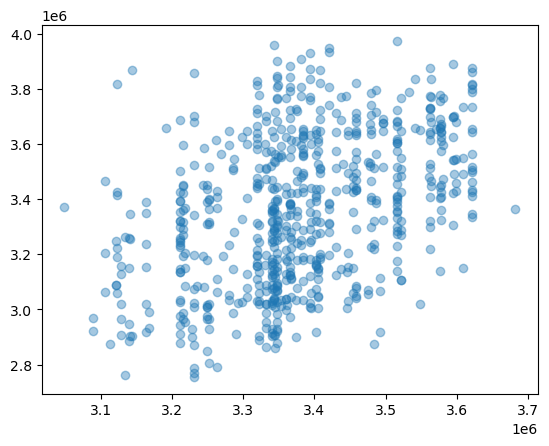

In [10]:
plot.scatter(y_pred, y_test, alpha=0.4)

### predictions before replacement - hyper parameters + lag features

In [11]:
water_data_before = pandas.read_csv('./waterinfo/cleaned_before.csv')

In [12]:
def create_lag_features(df, feature, lag=3):
    for i in range(1, lag + 1):
        df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    df = df.dropna()  # Remove rows with NaN values generated by shifting
    return df

water_data_before = create_lag_features(water_data_before, 'water_temperature_C')

In [13]:
# Separating features and target
X = water_data_before['water_temperature_C'].values.reshape(-1, 1)
y = water_data_before['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize Random Forest regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict with the best estimator
y_pred = best_rf.predict(X_test)

# Calculate scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and scores
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Absolute Error: 199848.49745174567
R-squared: 0.2088023689334183


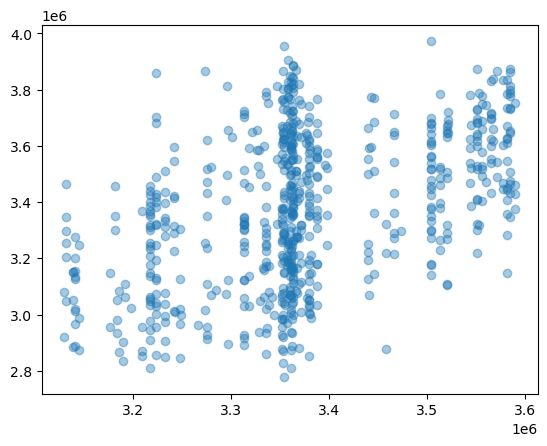

In [15]:
plot.scatter(y_pred, y_test, alpha=0.4)

# predictions after replacement

In [16]:
water_data_after = pandas.read_csv('./waterinfo/cleaned_after.csv')

In [17]:
water_data_after.describe()

,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
count,3481.0,3481.000000,3.481000e+03,3481.000000,3.481000e+03
mean,1.0,16.876673,1.436378e+06,12.814105,2.611412e+06
std,0.0,3.714440,3.787767e+07,3.915045,2.007767e+05
min,1.0,9.300000,-1.960000e+02,1.600000,2.213593e+06
25%,1.0,15.000000,-8.200000e+01,9.600000,2.448592e+06
50%,1.0,17.000000,0.000000e+00,12.800000,2.626218e+06
75%,1.0,19.900000,1.070000e+02,15.500000,2.774823e+06
max,1.0,23.600000,1.000000e+09,22.000000,2.977810e+06


In [18]:
# Separating features and target
X = water_data_after['water_temperature_C'].values.reshape(-1, 1)
y = water_data_after['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
random_forest_regressor = RandomForestRegressor(random_state=42)

# Training met train set
random_forest_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = random_forest_regressor.predict(X_test)

# scores berekenen

# Calculate scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Error: 159877.42408318297
R-squared: 0.12013731609677258


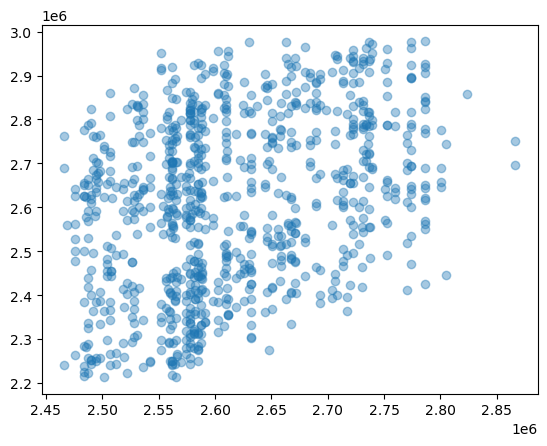

In [20]:
plot.scatter(y_pred, y_test, alpha=0.4)

### prediction after replacement - hyperparameters + lag features

In [44]:
water_data_after = pandas.read_csv('./waterinfo/cleaned_after.csv')

In [45]:
def create_lag_features(df, feature, lag=3):
    for i in range(1, lag + 1):
        df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    df = df.dropna()  # Remove rows with NaN values generated by shifting
    return df

water_data_after = create_lag_features(water_data_after, 'water_temperature_C')

In [46]:
X = water_data_after['water_temperature_C'].values.reshape(-1, 1)
y = water_data_after['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize Random Forest regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict with the best estimator
y_pred = best_rf.predict(X_test)

# Calculate scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and scores
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
Mean Absolute Error: 165532.8055857453
R-squared: 0.1393643581820635


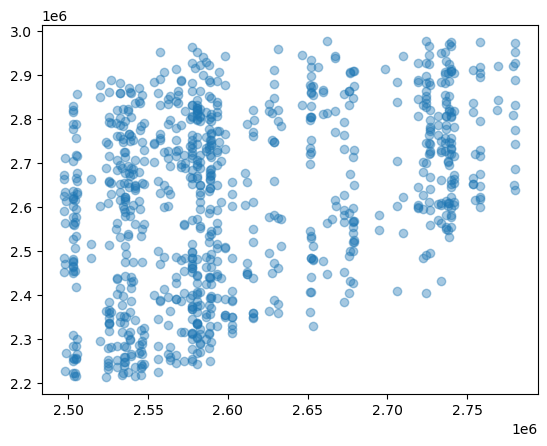

In [48]:
plot.scatter(y_pred, y_test, alpha=0.4)

# predictions entire dataset

In [93]:
all_water_data = pandas.read_csv('./waterinfo/cleaned_all.csv')
all_water_data.describe()

,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
count,6147.000000,6147.000000,6.147000e+03,6147.000000,6.147000e+03
mean,0.566293,16.262925,8.134150e+05,12.559135,2.942191e+06
std,0.495626,4.975516,2.851097e+07,4.811763,4.439806e+05
min,0.000000,4.400000,-1.960000e+02,-1.300000,2.213593e+06
25%,0.000000,13.000000,-8.200000e+01,9.300000,2.593692e+06
50%,1.000000,17.700000,1.000000e+00,13.200000,2.852416e+06
75%,1.000000,19.900000,1.080000e+02,15.650000,3.311642e+06
max,1.000000,25.200000,1.000000e+09,23.900000,3.973423e+06


Mean absolute Error: 274318.5754678883
R-squared: 0.38051793399611544


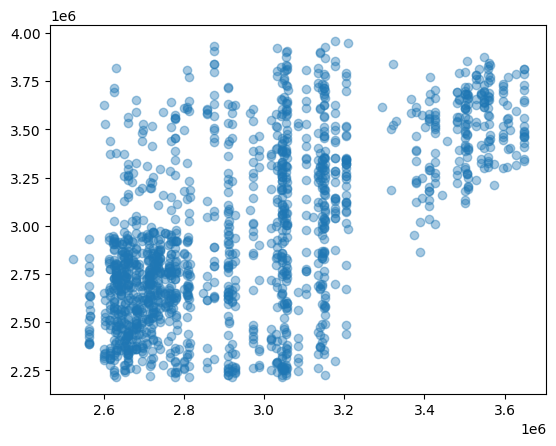

In [94]:
# Separating features and target
X = all_water_data['water_temperature_C'].values.reshape(-1, 1)
y = all_water_data['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
random_forest_regressor = RandomForestRegressor(random_state=42)

# Training met train set
random_forest_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = random_forest_regressor.predict(X_test)

# scores berekenen

# Calculate scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")
plot.scatter(y_pred, y_test, alpha=0.4)

### predictions entire dataset - hyperparameters + lag features

In [100]:
all_water_data = pandas.read_csv('./waterinfo/cleaned_all.csv')
all_water_data.describe()

,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
count,6147.000000,6147.000000,6.147000e+03,6147.000000,6.147000e+03
mean,0.566293,16.262925,8.134150e+05,12.559135,2.942191e+06
std,0.495626,4.975516,2.851097e+07,4.811763,4.439806e+05
min,0.000000,4.400000,-1.960000e+02,-1.300000,2.213593e+06
25%,0.000000,13.000000,-8.200000e+01,9.300000,2.593692e+06
50%,1.000000,17.700000,1.000000e+00,13.200000,2.852416e+06
75%,1.000000,19.900000,1.080000e+02,15.650000,3.311642e+06
max,1.000000,25.200000,1.000000e+09,23.900000,3.973423e+06


In [101]:
def create_lag_features(df, feature, lag=3):
    for i in range(1, lag + 1):
        df[f'{feature}_lag_{i}'] = df[feature].shift(i)
    df = df.dropna()  # Remove rows with NaN values generated by shifting
    return df

In [102]:

all_water_data = create_lag_features(all_water_data, 'water_temperature_C')

In [103]:
X = all_water_data['water_temperature_C'].values.reshape(-1, 1)
y = all_water_data['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute Error: 266368.0136045272
R-squared: 0.3828076479120447


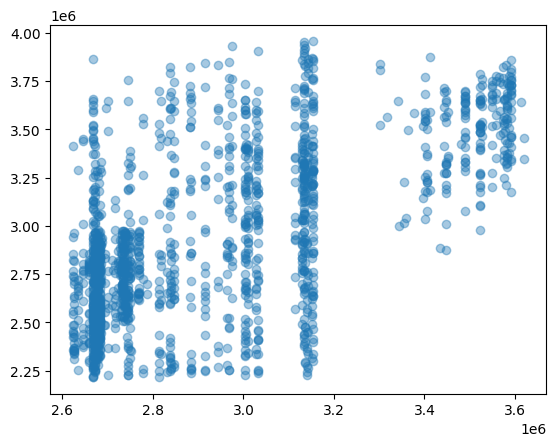

In [104]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize Random Forest regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict with the best estimator
y_pred = best_rf.predict(X_test)

# Calculate scores
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and scores
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
plot.scatter(y_pred, y_test, alpha=0.4)